# Visualizing Bouquets of Flower Shaped Trajectories
Tim Tyree<br>
12.19.2020

In [1]:
from lib.my_initialization import *
from lib.viewer.PlotFlowers import *
from lib.utils.utils_traj import *

%autocall 1
%load_ext autoreload
%autoreload 2
# awareness&chill

Automatic calling is: Smart


In [2]:
#make plots in darkmode
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

# import a file of unwrapped & centered spiral tip trajectories

In [3]:
#find file interactively
# print("please select a file from within the desired folder.")
# file = search_for_f?ile()

In [5]:
n_tips = 1
input_file_name = '/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.4_archive/trajectories_unwrapped/ic_200x200.003.13_traj_sr_400_mem_2.csv'
V_thresh = eval(input_file_name[input_file_name.find('_V_')+len('_V_'):].split('_')[0])
savefig_dir = os.path.join(nb_dir,f'Figures/flower-plots/V_{V_thresh}')
savefig_fn = os.path.basename(input_file_name).replace('.csv',f'_ntips_{n_tips}_longest_tips.png')
    
df = return_longest_n_and_truncate(input_file_name,n_tips = 1,DS = 5/200,DT = 1., round_t_to_n_digits=0)
df.reset_index(inplace=True)

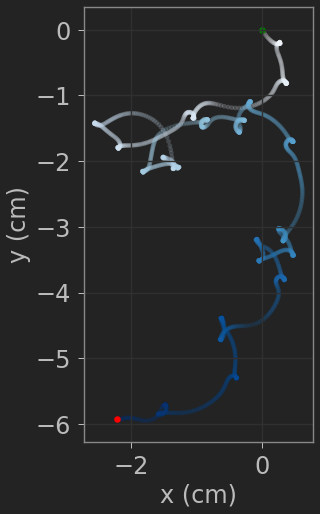

In [6]:
fig = PlotFlowerTrajectories(df, alpha=0.2)
plt.show()

# visualize the speed of one spiral tip

In [7]:
DT = 1. #ms between observations
pid_lst = sorted(set(df.particle.values))
#select one trajectory
pid = pid_lst[0]
d = df.loc[df.particle==pid]
#compute apparent velocity
d['vx']=d[['x']].diff().shift(-1)/DT
d['vy']=d[['y']].diff().shift(-1)/DT
#compute apparent acceleration
d['ax']=d[['vx']].diff().shift(-1)/DT
d['ay']=d[['vy']].diff().shift(-1)/DT
#compute apparent speed
d['speed'] = np.sqrt(d['vx']**2 + d['vy']**2)

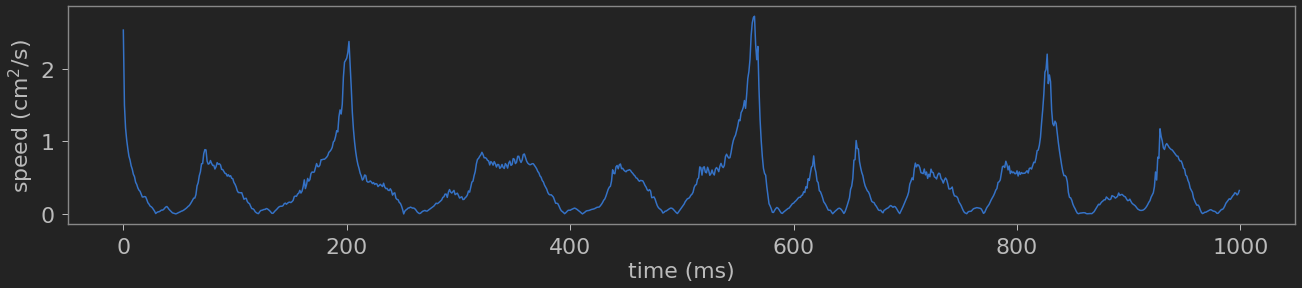

In [8]:
fontsize=22
x_values = d['t'].values - d['t'].values[0] 
y_values = d['speed'].values

fig, ax = plt.subplots(figsize=(22,4))
ax.plot(x_values[:1000], y_values[:1000])
ax.set_xlabel('time (ms)',fontsize=fontsize)
ax.set_ylabel(r'speed (cm$^2/$s)',fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
plt.show()
# d[['vx','vy']].head(20)
#.values[:20]

# rotate a trajectory so its initial velocity is in the +x direction
- then, TODO: compute acceleration
- then, TODO: compute handedness
- then, TODO: flip y and compute handedness again, does it make sense?

In [203]:
def rotate_df_by(df,theta):
    c = np.cos(theta)
    s = np.sin(theta)
    R = np.array([[c,-s],[s,c]])
    x = R[0][0]*df['x'] + R[1][0]*df['y']
    y = R[0][1]*df['x'] + R[1][1]*df['y']
    df['x'] = x
    df['y'] = y
    return df

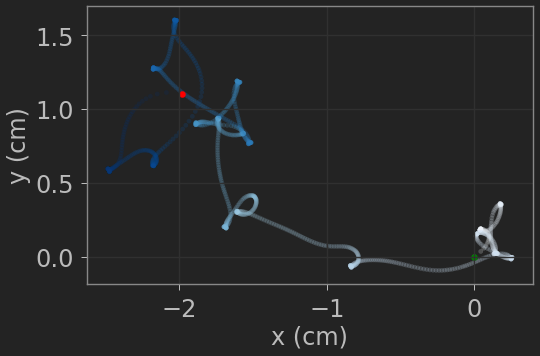

In [204]:
d = df.loc[df.particle==pid].copy()
#compute apparent velocity
d['vx']=d[['x']].diff().shift(-1)/DT
d['vy']=d[['y']].diff().shift(-1)/DT
#compute apparent acceleration
d['ax']=d[['vx']].diff().shift(-1)/DT
d['ay']=d[['vy']].diff().shift(-1)/DT
#compute apparent speed
d['speed'] = np.sqrt(d['vx']**2 + d['vy']**2)

ax = PlotFlowerTrajectories(d, alpha=0.2)
plt.show()



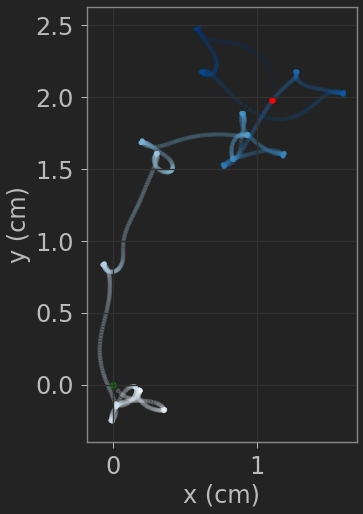

In [205]:
ax = PlotFlowerTrajectories(rotate_df_by(d,np.pi/2), alpha=0.2)
plt.show()

In [225]:
def rotate_tail_to_xaxis(df,pid,DT=1.):
    '''rotates the death point to the positive x axis
    Example Usage:
    d,theta = rotate_tail_to_xaxis(df,pid,DT)
    '''
    d = df.loc[df.particle==pid].copy()
    
#     #compute apparent velocity
#     d['vx']=d[['x']].diff().shift(-1)/DT
#     d['vy']=d[['y']].diff().shift(-1)/DT
#     #compute apparent acceleration
#     d['ax']=d[['vx']].diff().shift(-1)/DT
#     d['ay']=d[['vy']].diff().shift(-1)/DT
    #compute apparent speed
    #     d['speed'] = np.sqrt(d['vx']**2 + d['vy']**2)

    x = d.head(1).x.values[0]
    y = d.head(1).y.values[0]
    d['x'] -= x
    d['y'] -= y
    #     vx = d.head(1).vx.values[0]
    #     vy = d.head(1).vy.values[0]
    #     v0 = np.array([vx,vy])
    xT = d.tail(1).x.values[0]
    yT = d.tail(1).y.values[0]
    vT = np.array([xT-x,yT-y])
    v_targ = vT#v0
    vx = v_targ[0]; vy = v_targ[1]
    spd = np.sqrt ( vx**2 + vy**2 ) 
    theta = np.arcsin(vx/spd)# cos gives the unsigned theta np.arccos(vx/spd)
    d = rotate_df_by(d,-theta)
    
#     x = d.head(1).x.values[0]
#     y = d.head(1).y.values[0]
#     d['x'] -= x
#     d['y'] -= y
#     #     vx = d.head(1).vx.values[0]
#     #     vy = d.head(1).vy.values[0]
#     #     v0 = np.array([vx,vy])
#     xT = d.tail(1).x.values[0]
#     yT = d.tail(1).y.values[0]
#     vT = np.array([xT-x,yT-y])
#     v_targ = vT#v0
#     vx = v_targ[0]; vy = v_targ[1]
#     spd = np.sqrt ( vx**2 + vy**2 ) 
#     theta = np.arccos(vx/spd)# cos gives the unsigned theta np.arccos(vx/spd)
#     d = rotate_df_by(d,theta)
#     xT = d.tail(1).x.values[0]
#     yT = d.tail(1).y.values[0]
#     vT = np.array([xT-x,yT-y])
#     v_targ = vT#v0
#     vx = v_targ[0]; vy = v_targ[1]
#     spd = np.sqrt ( vx**2 + vy**2 ) 
#     theta = np.arcsin(vy/spd)# cos gives the unsigned theta np.arccos(vx/spd)
#     d = rotate_df_by(d,np.pi/2-theta)
    
    
#     d = rotate_df_by(d,np.pi-theta)
    return d,theta#v_targ#theta
    #     d = rotate_df_by(d,np.pi-theta)
# def PlotFlowerTrajRotated(df,pid,ax=None,**kwargs):

#     ax = PlotFlowerTrajectories(d, alpha=0.2, ax=ax, **kwargs)
#     return ax, d, theta

In [226]:
theta
# np.arcsin?
np.arctan2?

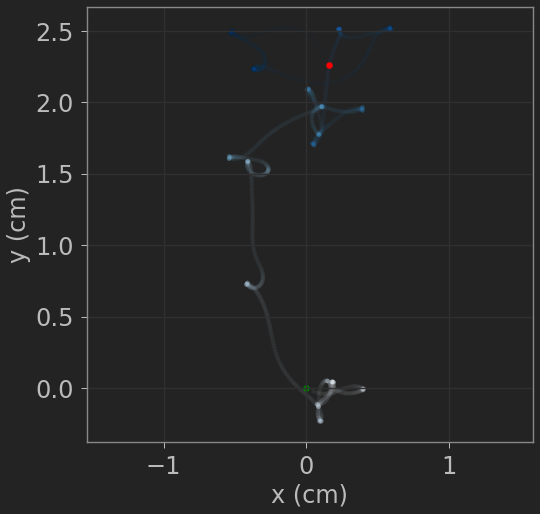

-1.1310388578565749

In [227]:

d,theta = rotate_tail_to_xaxis(df,pid)#,ax=None,**kwargs)
ax = PlotFlowerTrajectories(d, alpha=0.05, ax=None)#axPlotFlowerTrajectories(df,pid)#,ax=None)
ax.axis('equal')
plt.show()
theta

In [228]:
# d.tail(1)
# df[df.particle==pid]
# d.head()
# np.arcsin?
# np.cos(theta)
# theta*180/np.pi
# theta*DS
# set(d.particle.values)
(d.head(1).values.T - d.tail(1).values.T)#[3:]
# d.columns
# theta
d.tail(2)

,index,t,n,x,y,theta,grad_ux,grad_uy,grad_vx,grad_vy,v,f,s,dvdt,dfdt,dsdt,frame,particle
13292,14563,2619.0,6,5.721225e+00,81.220190,NaN,-36.96650,30.64791,-9.51345,9.2199,0.40397,0.09423,0.86956,-0.00015,-0.00723,-0.00109,2619,74
13293,14564,2620.0,6,2.486900e-14,70.950433,3.0322,-0.89051,2.41996,-0.83401,2.3860,0.44012,0.09197,0.86223,-0.00121,-0.00706,-0.00108,2620,74


# Visualize a floral jet (then get ready for bed!)

In [229]:
n_tips = 100
DT = 1. #ms between observations
n_avg_v0 = 3
alpha = 0.01
input_file_name = '/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.4_archive/trajectories_unwrapped/ic_200x200.003.13_traj_sr_400_mem_2.csv'
V_thresh = eval(input_file_name[input_file_name.find('_V_')+len('_V_'):].split('_')[0])
savefig_dir = os.path.join(nb_dir,f'Figures/flower-plots/V_{V_thresh}')
savefig_fn = os.path.basename(input_file_name).replace('.csv',f'_ntips_{n_tips}_longest_tips.png')
    
df = return_longest_n_and_truncate(input_file_name,n_tips = n_tips,DS = 5/200,DT = DT, round_t_to_n_digits=0)
df.reset_index(inplace=True)
pid_lst = sorted(set(df.particle.values))
df_lst = []
for pid in pid_lst:
#     d = df.loc[df.particle==pid].copy()
#     #compute apparent velocity
#     d['vx']=d[['x']].diff().shift(-1)/DT
#     d['vy']=d[['y']].diff().shift(-1)/DT
#     #compute apparent acceleration
#     d['ax']=d[['vx']].diff().shift(-1)/DT
#     d['ay']=d[['vy']].diff().shift(-1)/DT
#     #compute apparent speed
#     d['speed'] = np.sqrt(d['vx']**2 + d['vy']**2)

#     vx = np.mean(d.head(n_avg_v0).vx.values)
#     vy = np.mean(d.head(n_avg_v0).vy.values)
#     v0 = np.array([vx,vy])
#     spd = np.sqrt ( vx**2 + vy**2 ) 
#     theta = -np.arcsin(vy/spd)# cos gives the unsigned theta np.arccos(vx/spd)
#     d = rotate_df_by(d,theta)
    d,theta = rotate_tail_to_xaxis(df,pid)#,ax=None,**kwargs)
    df_lst.append(d)
df = pd.concat(df_lst)
beep(1)

0

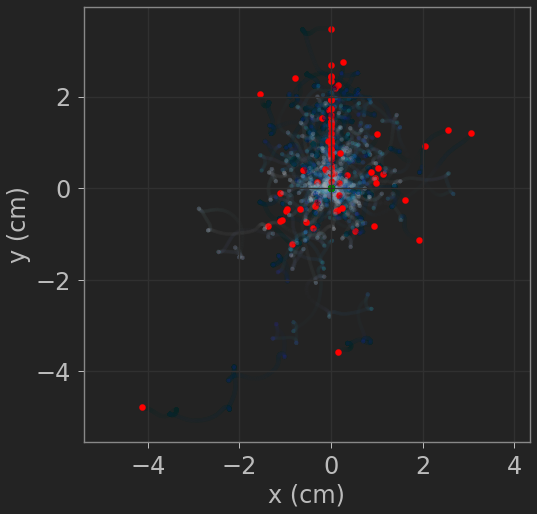

In [230]:
fig = PlotFlowerTrajectories(df, alpha=alpha)
plt.axis('equal')
plt.show()

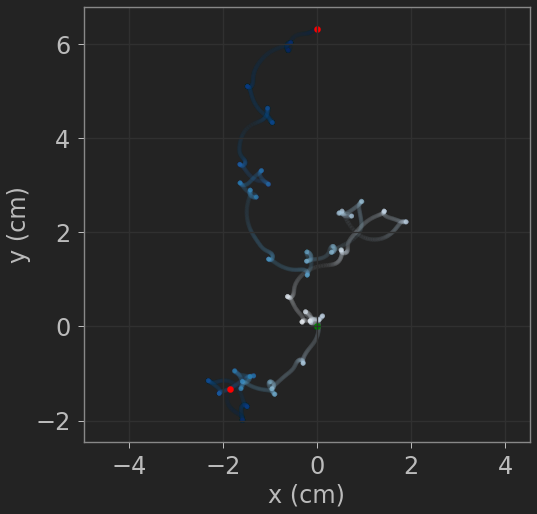

0

In [42]:
df = pd.read_csv(input_file_name)
df = df[df.t>100].copy()
df.reset_index(inplace=True)
s = df.groupby('particle').t.count()
s = s.sort_values(ascending=False)
pid_longest_lst = list(s.index.values)#[:n_tips])
DS = 5./200.

df_lst = []
fig, ax = plt.subplots(figsize=(8,8))
for pid in pid_longest_lst[:2]:
    d,theta = rotate_tail_to_xaxis(df,pid)#,ax=None,**kwargs)
    ax = PlotFlowerTrajectories(d, alpha=0.05, ax=ax)#axPlotFlowerTrajectories(df,pid)#,ax=None)
    df_lst.append(d)
ax.axis('equal')
plt.show()
theta

# df = pd.concat(df_lst)
beep(1)
